In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\DELL\Downloads\survey_data (1).csv.crdownload")
print(data.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
missing_values = data[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print(missing_values)

Employment       0
JobSat        1408
RemoteWork     478
dtype: int64


In [7]:
most_frequent_employment = data['Employment'].mode()[0]
data['Employment'].fillna(most_frequent_employment, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20400\4015330740.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Employment'].fillna(most_frequent_employment, inplace=True)


In [9]:
missing_percentage = data['JobSat'].isna().sum()
if missing_percentage < 0.05:
    data.dropna(subset=['JobSat'], inplace=True)
else:
    most_frequent_jobsat = data['JobSat'].mode()[0]
    data['JobSat'].fillna(most_frequent_jobsat, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20400\3680920914.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['JobSat'].fillna(most_frequent_jobsat, inplace=True)


In [11]:
most_frequent_remote = data['RemoteWork'].mode()[0]
data['RemoteWork'].fillna(most_frequent_remote, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20400\2061726497.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RemoteWork'].fillna(most_frequent_remote, inplace=True)


In [13]:
print(data[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

Employment    0
JobSat        0
RemoteWork    0
dtype: int64


In [17]:
import numpy as np 
data['YearsCodePro'] = pd.to_numeric(data['YearsCodePro'], errors='coerce')

In [21]:
bins = [0, 5, 10, 20, np.inf]
labels = ['0-5', '5-10', '10-20', '>20']
data['ExperienceRange'] = pd.cut(data['YearsCodePro'], bins=bins, labels=labels, include_lowest=True)

In [23]:
job_sat_mapping = {
    'Very dissatisfied':1,
    'slightly dissatisfied':2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
data['JobSat_Num'] = data['JobSat'].map(job_sat_mapping)

In [25]:
median_satisfaction = data.groupby('ExperienceRange')['JobSat_Num'].median()
print(median_satisfaction)

ExperienceRange
0-5     NaN
5-10    NaN
10-20   NaN
>20     NaN
Name: JobSat_Num, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_20400\3692700787.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = data.groupby('ExperienceRange')['JobSat_Num'].median()


C:\Users\DELL\AppData\Local\Temp\ipykernel_20400\2033090701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_satisfaction.index, y=median_satisfaction.values, palette='Blues_d')


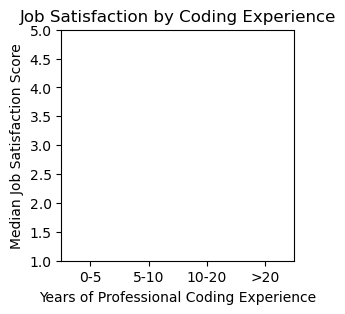

In [29]:
plt.figure(figsize=(3,3))
sns.barplot(x=median_satisfaction.index, y=median_satisfaction.values, palette='Blues_d')
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Median Job Satisfaction Score")
plt.title("Job Satisfaction by Coding Experience")
plt.ylim(1,5)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_20400\3600592941.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="JobSat", order=[


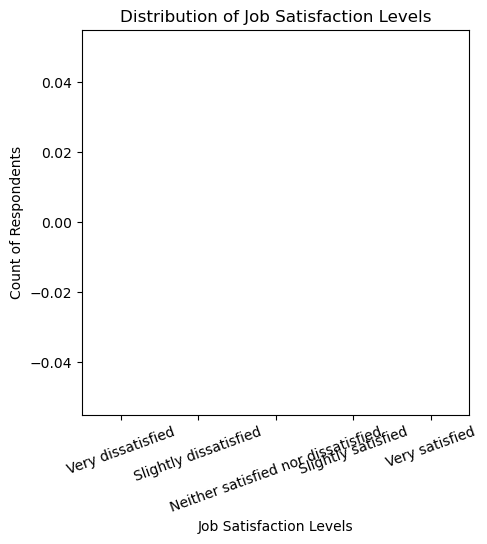

In [31]:
plt.figure(figsize=(5, 5))
sns.countplot(data=data, x="JobSat", order=[
    "Very dissatisfied", "Slightly dissatisfied",
    "Neither satisfied nor dissatisfied", "Slightly satisfied",
    "Very satisfied"], palette="coolwarm")
plt.xlabel("Job Satisfaction Levels")
plt.ylabel("Count of Respondents")
plt.title("Distribution of Job Satisfaction Levels")
plt.xticks(rotation=20)  # Rotate x labels for readability
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_20400\4019064246.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="RemoteWork", order=data["RemoteWork"].value_counts().index, palette="coolwarm")


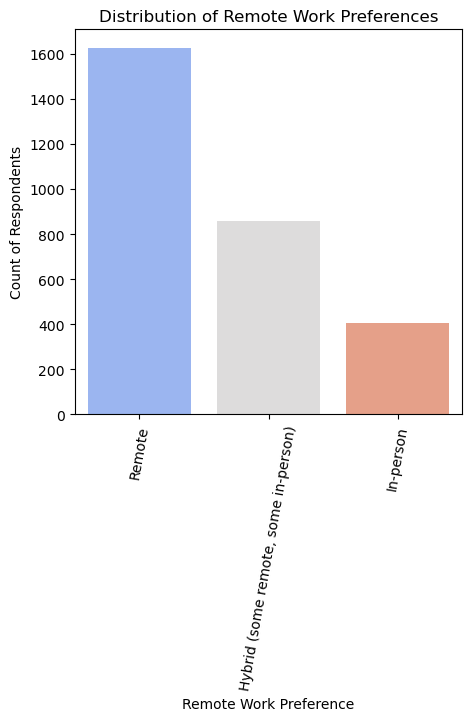

In [45]:
plt.figure(figsize=(5, 5))
sns.countplot(data=data, x="RemoteWork", order=data["RemoteWork"].value_counts().index, palette="coolwarm")
plt.xlabel("Remote Work Preference")
plt.ylabel("Count of Respondents")
plt.title("Distribution of Remote Work Preferences")
plt.xticks(rotation=80)
plt.show()

In [47]:
remote_work_by_employment = pd.crosstab(data["Employment"], data["RemoteWork"], normalize="index") * 100
print(remote_work_by_employment)

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                            38.653511   
Employed, full-time;Employed, part-time                                        33.333333   
Employed, full-time;Independent contractor, fre...                             30.000000   
Employed, full-time;Independent contractor, fre...                             50.000000   
Employed, full-time;Independent contractor, fre...                              0.000000   
Employed, full-time;Independent contractor, fre...                             50.000000   
Employed, full-time;Not employed, but looking f...                              0.000000   
Employed, full-time;Retired                                                     0.000000   
Employed, full-time;Student, full-time                                         2

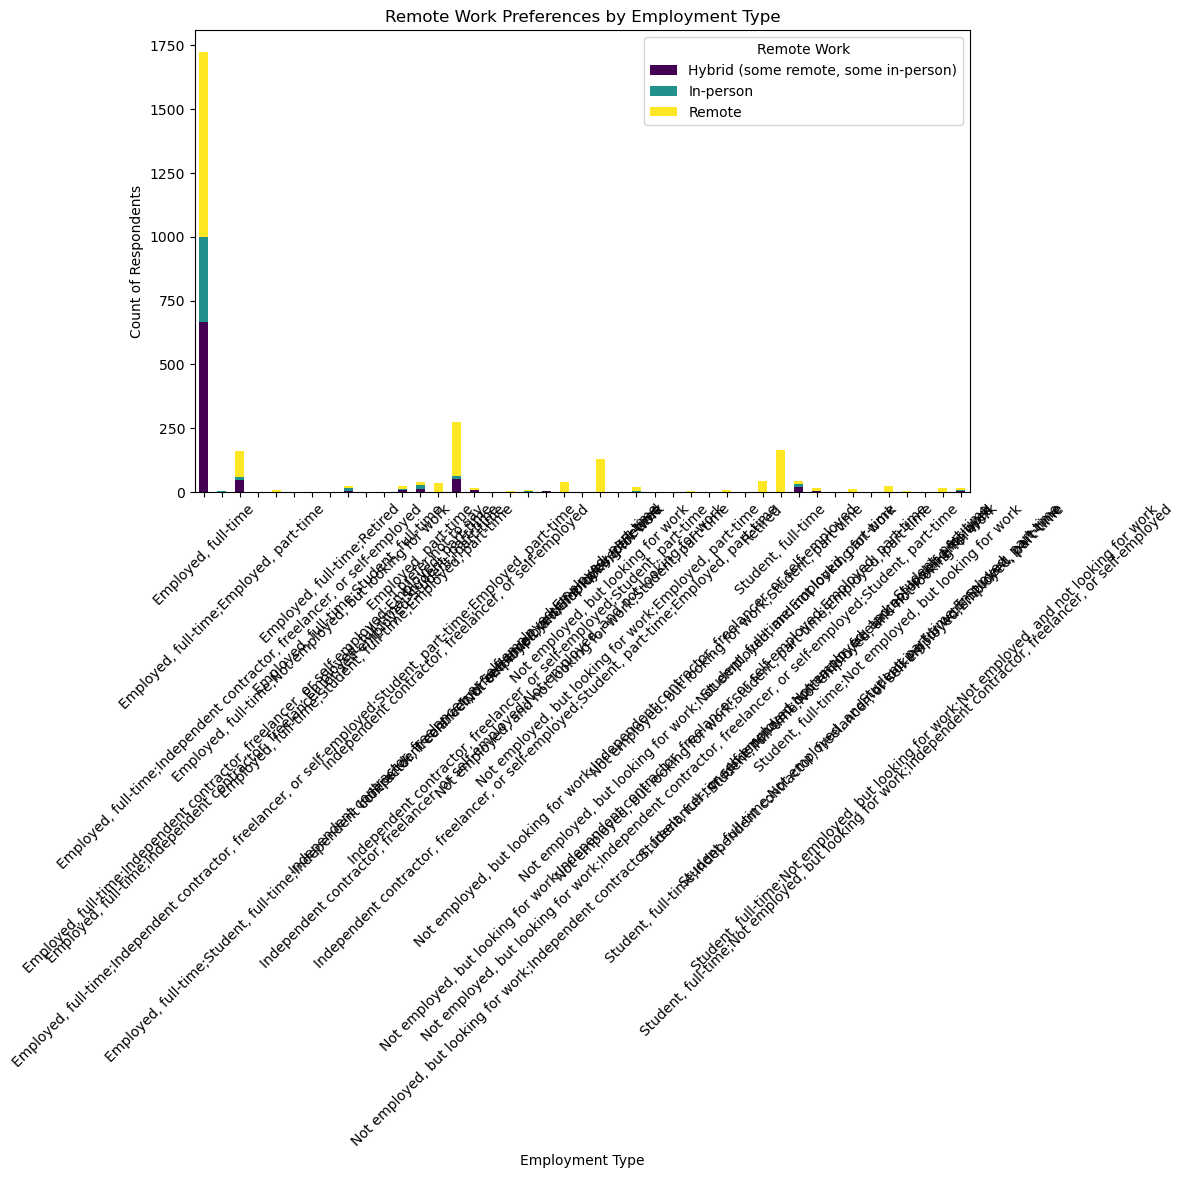

In [53]:
remote_work_by_role = pd.crosstab(data["Employment"], data["RemoteWork"])
remote_work_by_role.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.xlabel("Employment Type")
plt.ylabel("Count of Respondents")
plt.title("Remote Work Preferences by Employment Type")
plt.xticks(rotation=45)
plt.legend(title="Remote Work")
plt.show()

In [55]:
data_exploded = data.assign(Language=data["LanguageHaveWorkedWith"].str.split(";")).explode("Language")
lang_region_counts = data_exploded.groupby(["Country", "Language"]).size().reset_index(name="Count")
top_languages_india = lang_region_counts[lang_region_counts["Country"] == "India"].sort_values(by="Count", ascending=False)
print(top_languages_india.head(n=10)) 

    Country                 Language  Count
830   India               JavaScript     88
828   India                 HTML/CSS     66
841   India                   Python     61
845   India                      SQL     54
849   India               TypeScript     49
829   India                     Java     46
820   India                        C     29
819   India  Bash/Shell (all shells)     28
822   India                      C++     24
838   India                      PHP     19


C:\Users\DELL\AppData\Local\Temp\ipykernel_20400\1787592322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_languages_usa, x="Count", y="Language", palette="coolwarm")


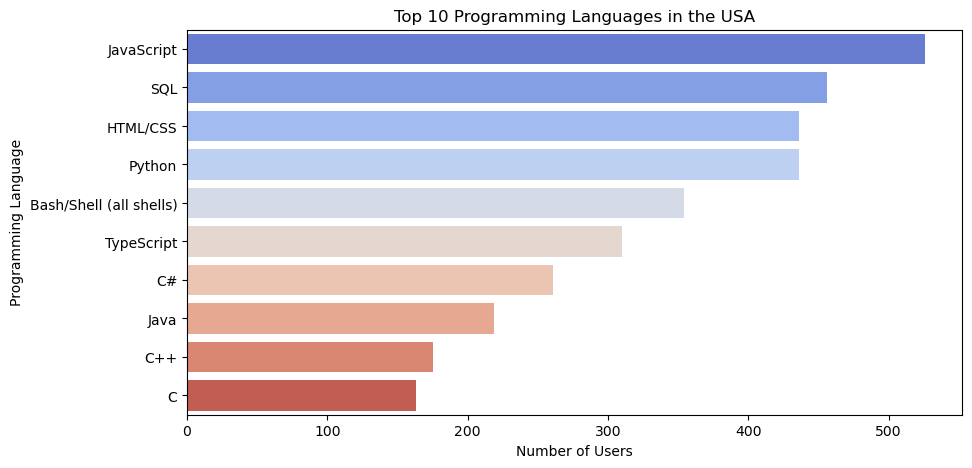

In [57]:
top_languages_usa = lang_region_counts[lang_region_counts["Country"] == "United States of America"].nlargest(10, "Count")
plt.figure(figsize=(10, 5))
sns.barplot(data=top_languages_usa, x="Count", y="Language", palette="coolwarm")
plt.xlabel("Number of Users")
plt.ylabel("Programming Language")
plt.title("Top 10 Programming Languages in the USA")
plt.show()

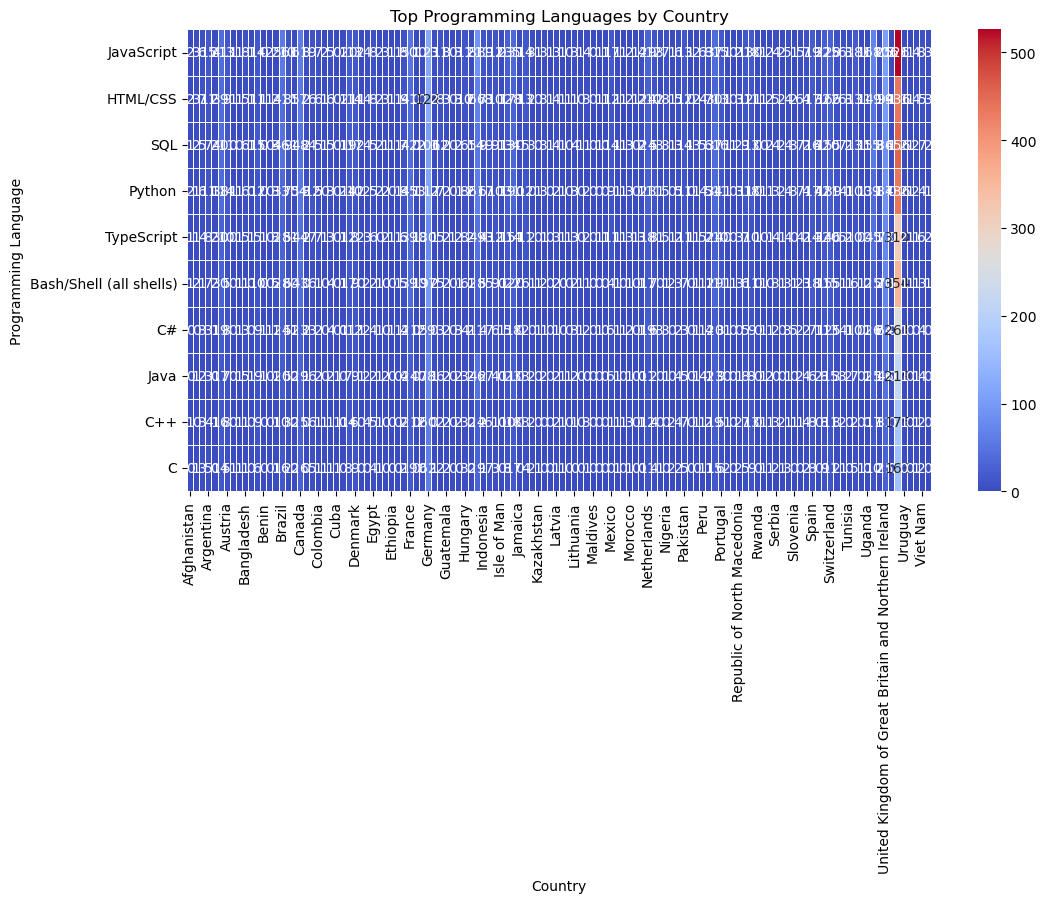

In [59]:
heatmap_data = lang_region_counts.pivot_table(index="Language", columns="Country", values="Count", fill_value=0)
top_languages = heatmap_data.sum(axis=1).nlargest(10).index
heatmap_data = heatmap_data.loc[top_languages]
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel("Country")
plt.ylabel("Programming Language")
plt.title("Top Programming Languages by Country")
plt.show()

In [63]:
data["YearsCodePro"] = pd.to_numeric(data["YearsCodePro"], errors="coerce")
data["JobSatPoints_1"] = pd.to_numeric(data["JobSatPoints_1"], errors="coerce")
data_cleaned = data.dropna(subset=["YearsCodePro", "JobSatPoints_1"])

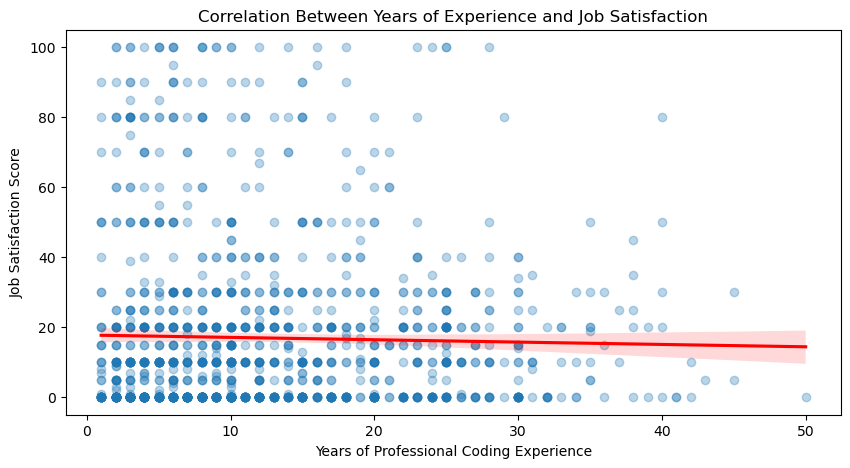

In [65]:
plt.figure(figsize=(10, 5))
sns.regplot(data=data_cleaned, x="YearsCodePro", y="JobSatPoints_1", scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction Score")
plt.title("Correlation Between Years of Experience and Job Satisfaction")
plt.show()

In [67]:
ed_emp_ct = pd.crosstab(data["EdLevel"], data["Employment"], normalize="index") * 100  # Convert to percentage
print(ed_emp_ct)

Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                           61.250000   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                  67.023908   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)               67.972028   
Primary/elementary school                                     16.981132   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                63.636364   
Secondary school (e.g. American high school, Ge...            31.404959   
Some college/university study without earning a...            45.646438   
Something else                                                26.666667   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

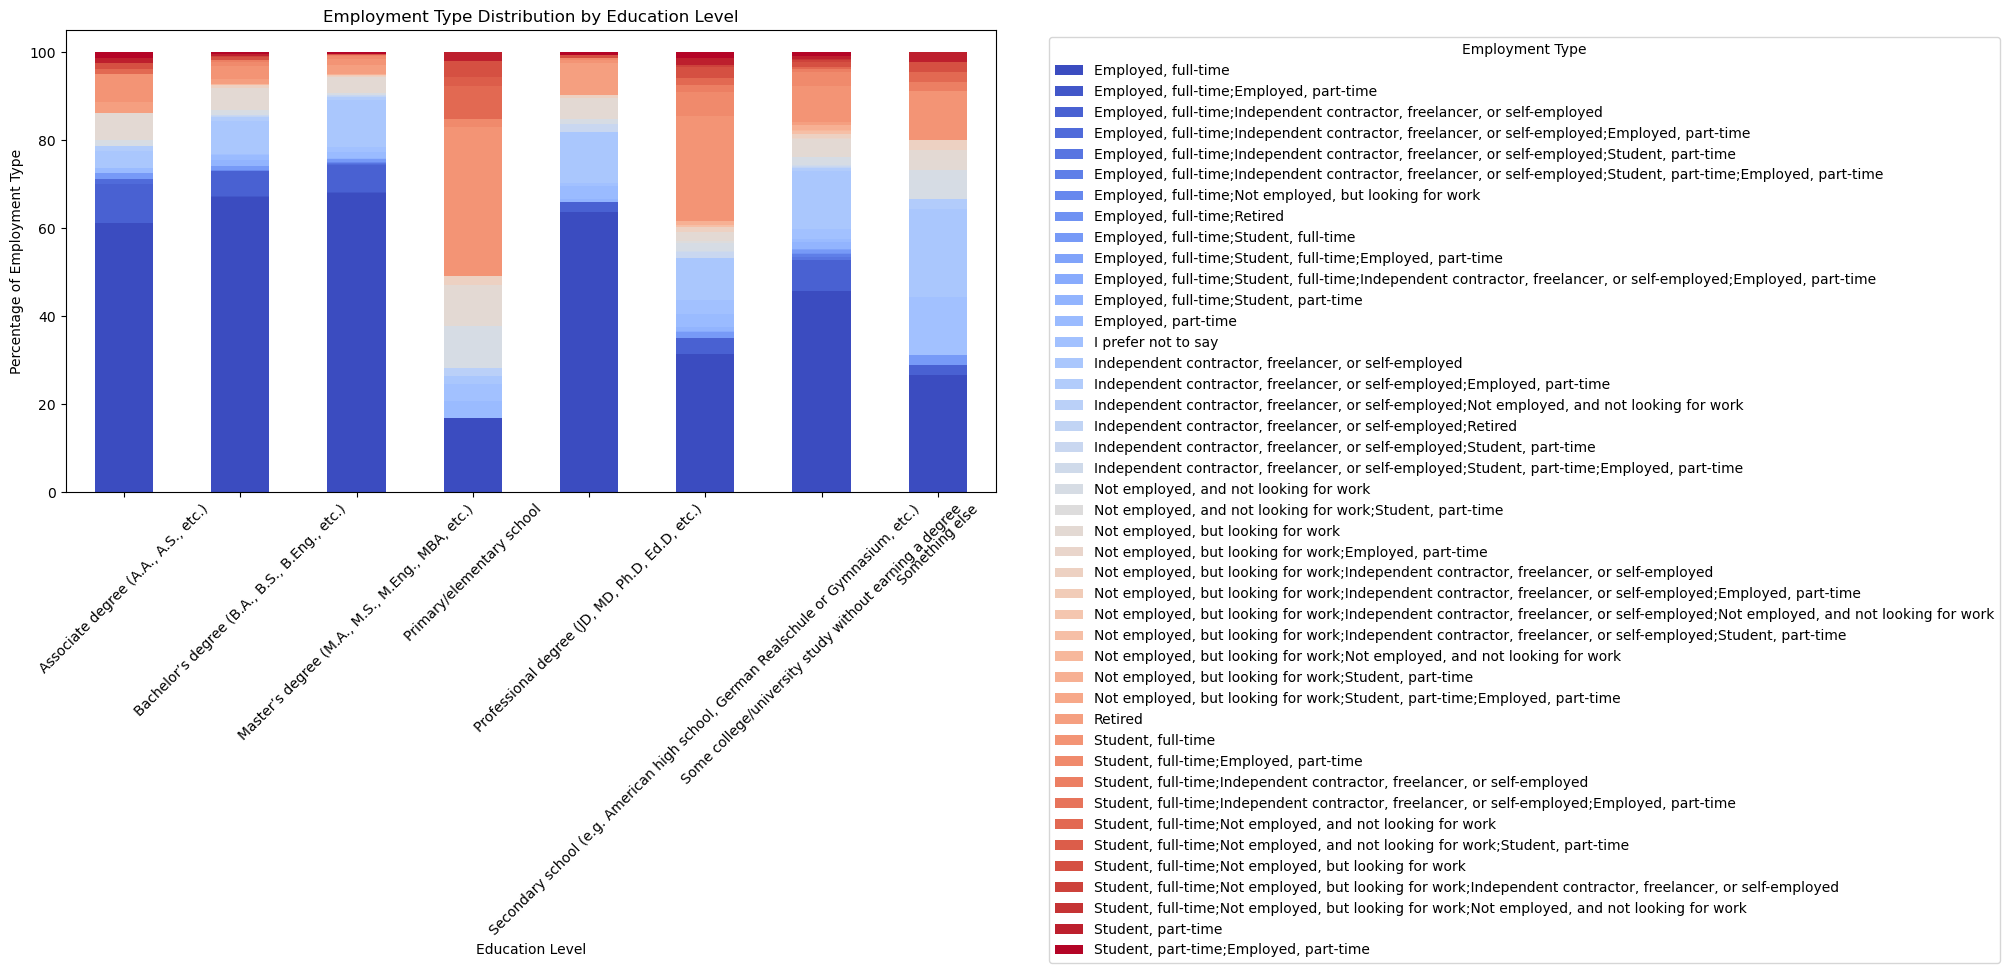

In [69]:
ed_emp_ct.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.xlabel("Education Level")
plt.ylabel("Percentage of Employment Type")
plt.title("Employment Type Distribution by Education Level")
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

In [79]:
data.to_excel("modified_dataset.xlsx", index=False)